# **DIP Assignment - 2**
##### (Monsoon 2023-24)

> **Name**: *Bhav Beri*
> 
> **Roll Number**: *2021111013*

> ### _**Question 1**_

## Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

import cv2

## Global Config

In [2]:
threshold_g = 210
threshold_rb = 200

In [3]:
base_path = "../Images/{}"

## Util Functions

In [4]:
def read_image(path, cvtcolor="RGB"):
    if cvtcolor == "RGB":
        return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2RGB)
    elif cvtcolor == "GRAY":
        return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2GRAY)

def write_image(image, path):
    if not os.path.exists(path):
        os.mkdir(path)
    cv2.imwrite(path, image)

def show_image(image, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()

In [5]:
def images(fg_path, bg_path):
    fg = read_image(fg_path)
    bg = read_image(bg_path)

    fg = cv2.resize(fg, (bg.shape[1], bg.shape[0]))
    return fg, bg

def inRange_rgb(arr):
    return np.where((arr[:,:,1] > threshold_g) & (arr[:,:,0] < threshold_rb) & (arr[:,:,2] < threshold_rb), 255, 0)

In [6]:
def mask_image(image, mask, negative=False):
    if negative:
        image[mask == 0] = [0, 0, 0]
    else:
        image[mask != 0] = [0, 0, 0]
    return image

## Main Code

In [7]:
fg, bg = images('oppenheimer.png', 'atomicbomb.jpg')

fg = cv2.resize(fg, (bg.shape[1], bg.shape[0]))

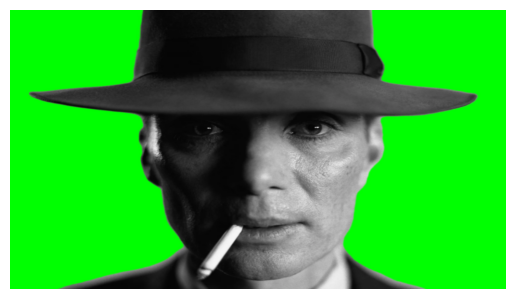

In [8]:
show_image(fg)

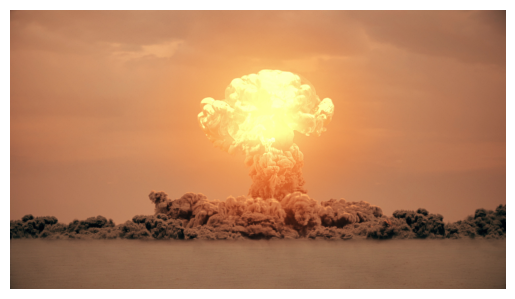

In [9]:
show_image(bg)

In [10]:
image1 = np.copy(fg)
mask = inRange_rgb(image1)

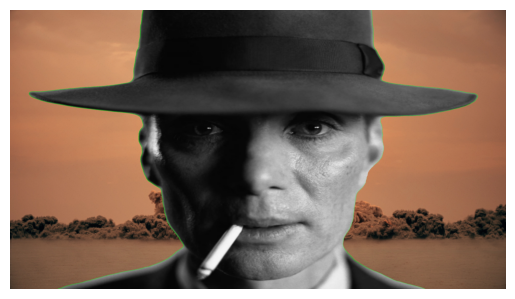

In [11]:
masked_fg = mask_image(fg, mask)
masked_bg = mask_image(bg, mask, negative=True)

new_image = masked_fg + masked_bg

show_image(new_image)

In [12]:
fg, bg = images('fg.jpg', 'bg.jpg')

image1 = np.copy(fg)
mask = inRange_rgb(image1)

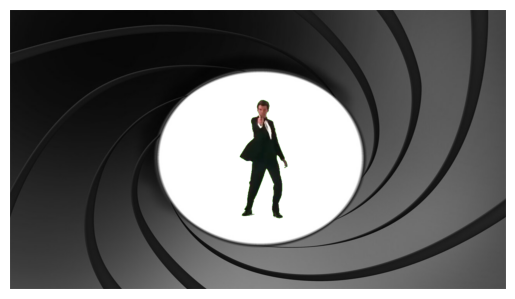

In [13]:
masked_fg = mask_image(fg, mask)
masked_bg = mask_image(bg, mask, negative=True)

new_image = masked_fg + masked_bg

show_image(new_image)

In [14]:
fg, bg = images('fg1.jpg', 'bg1.jpg')

image1 = np.copy(fg)
mask = inRange_rgb(image1)

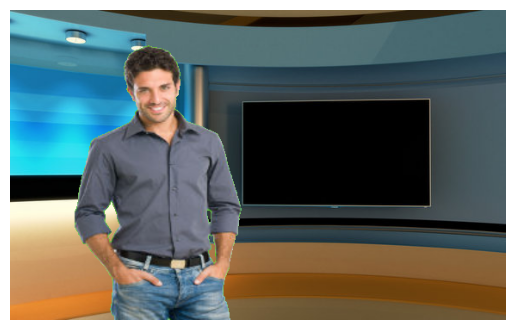

In [15]:
masked_fg = mask_image(fg, mask)
masked_bg = mask_image(bg, mask, negative=True)

new_image = masked_fg + masked_bg

show_image(new_image)

## Part - C

1. > Storage required for a single RGB image:

   Storage required for a single image = 720 x 480 x (3 bytes per pixel)
                                       = 1,036,800 bytes

2. > Convert bytes to gigabytes:

   Storage required for a single image in gigabytes = 1,036,800 bytes / (1024^3 bytes per GB)
                                                  ≈ 0.0009656 GB

3. > Calculate how many images can be stored in 2 GB:

   Number of images = 2 GB / 0.0009656 GB per image
                  **≈ 2071 images**